In [1]:
#numpy and pandas used for data manipulation
import numpy as np
import pandas as pd
#matplotlib used for visualization
from matplotlib import pyplot as plt
#os used to get file directories
import os
#opencv used to make get images into numbered arrays
import cv2
import random
from time import time

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC


First, grab all the file directories for images which are:
* size 1
* showing a straight or up profile
* not wearing sunglasses

In [2]:
def get_filedir(list):
    allnames = []
    count = 0
    tempname = 'an2i'
    for (dirpath, dirnames, filenames) in os.walk("faces/"):
        allnames.extend(filenames)
    for name in allnames[1:]:
        if (name.split("_")[1] in ['straight', 'up']) and (name.split('_')[-1] not in ['2.pgm', '4.pgm', 'sunglasses.pgm']) and (name[-3:] =='pgm'):
            if name.split('_')[0] != tempname:
                count = count + 1
                tempname = name.split('_')[0]
                filedir.append([])
            filedir[count].append('faces/' + name.split('_')[0] + '/' + name)

In [3]:
filedir = [[]]
get_filedir(filedir)

the first 2 people in the file:

In [4]:
filedir[:2]

[['faces/an2i/an2i_straight_angry_open.pgm',
  'faces/an2i/an2i_straight_happy_open.pgm',
  'faces/an2i/an2i_straight_neutral_open.pgm',
  'faces/an2i/an2i_straight_sad_open.pgm',
  'faces/an2i/an2i_up_angry_open.pgm',
  'faces/an2i/an2i_up_happy_open.pgm',
  'faces/an2i/an2i_up_neutral_open.pgm',
  'faces/an2i/an2i_up_sad_open.pgm'],
 ['faces/at33/at33_straight_angry_open.pgm',
  'faces/at33/at33_straight_happy_open.pgm',
  'faces/at33/at33_straight_neutral_open.pgm',
  'faces/at33/at33_straight_sad_open.pgm',
  'faces/at33/at33_up_angry_open.pgm',
  'faces/at33/at33_up_happy_open.pgm',
  'faces/at33/at33_up_neutral_open.pgm',
  'faces/at33/at33_up_sad_open.pgm']]

an example of an image:

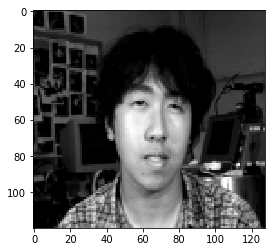

In [5]:
img1 = cv2.imread(filedir[0][0],0)
plt.imshow(img1, plt.cm.gray)
plt.show()

split the set into a training set and a testing set, with pics organized per person, and 3 per person in the train set

In [6]:
def get_person_name(name_list, filedir):
    for person in filedir:
        for img in person:
            name_list.append(img.split('/')[1])

In [7]:
def get_img_matrix(img_list, filedir):
    for person in filedir:
        for img in person:
            img_list.append(cv2.imread(img, 0).ravel())

In [8]:
names = []
get_person_name(names, filedir)

img_matrix = []
get_img_matrix(img_matrix, filedir)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(img_matrix, names, test_size=0.3, random_state=1)

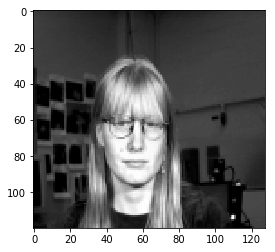

In [10]:
image1 = np.array(X_test[0]).reshape(img1.shape)
plt.imshow(image1, plt.cm.gray)
plt.show()

In [11]:
pca1 = PCA(n_components=50)
pca1.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca1.components_
#list of principle components

array([[ -2.86448057e-03,  -2.58679388e-03,  -2.03174157e-03, ...,
          3.23999713e-04,   8.26207421e-05,   4.51502751e-04],
       [  2.62953521e-03,   2.22492381e-03,   9.12508423e-04, ...,
          7.95321441e-03,   7.57360659e-03,   6.43419296e-03],
       [ -7.69048605e-03,  -8.29832832e-03,  -6.77859302e-03, ...,
         -5.63766710e-03,  -5.67346328e-03,  -5.19314968e-03],
       ..., 
       [ -8.08630081e-04,  -1.07511303e-03,  -2.85682220e-03, ...,
          1.27304349e-03,   2.66207644e-03,   3.18076007e-03],
       [ -2.55982222e-04,   3.70673721e-05,   5.49103035e-04, ...,
          2.46539776e-03,  -1.30319372e-04,   4.32830593e-03],
       [ -2.03814035e-03,  -1.88380161e-03,  -6.61752844e-04, ...,
          2.43400842e-03,   7.35842254e-04,   1.20813992e-03]])

In [13]:
img1.shape

(120, 128)

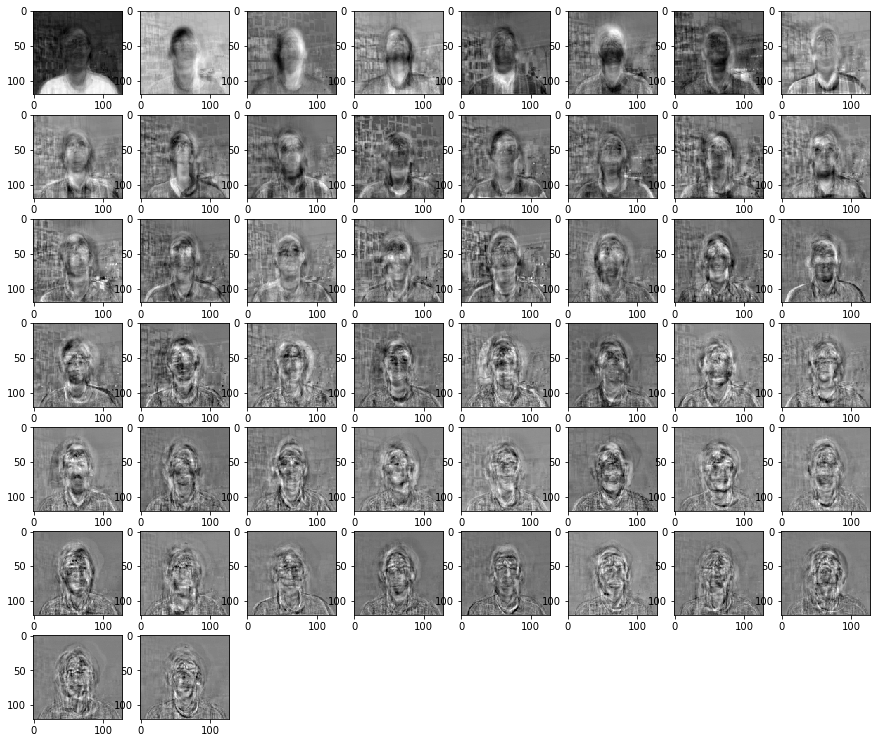

In [14]:
eigenfaces = pca1.components_.reshape((50, 120, 128))
i = 1
plt.figure(figsize=(15, 15))
for row in eigenfaces:
    plt.subplot(8,8,i)
    plt.imshow(row, plt.cm.gray)
    i = i + 1
plt.show()

In [15]:
x_train_pca = pca1.transform(X_train)
x_test_pca = pca1.transform(X_test)

In [16]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(x_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 0.868s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [17]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(x_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))#, labels=range(n_classes)))

Predicting people's names on the test set
done in 0.009s
             precision    recall  f1-score   support

       an2i       0.00      0.00      0.00         1
       at33       1.00      1.00      1.00         1
     boland       0.00      0.00      0.00         3
        bpm       0.00      0.00      0.00         3
       ch4f       1.00      0.50      0.67         2
     cheyer       0.00      0.00      0.00         3
      choon       0.00      0.00      0.00         3
    danieln       0.00      0.00      0.00         3
   glickman       0.00      0.00      0.00         2
    karyadi       0.00      0.00      0.00         3
       kk49       0.00      0.00      0.00         4
      megak       0.00      0.00      0.00         2
   mitchell       0.00      0.00      0.00         2
      night       0.00      0.00      0.00         2
     phoebe       0.00      0.00      0.00         4
     saavik       0.00      0.00      0.00         3
     steffi       0.02      1.00      0.0

C:\Users\emily\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


some code copied from: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html#sphx-glr-auto-examples-applications-face-recognition-py